In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

In [2]:
# Define paths to the folders containing your data
folder_path1 = 'P:/LAB/Manuel/2023/2023-06/Microscopy/20230618_DflhE-FliG-FlgE/Tiff_NoDeconvolution/'
folder_path2 = 'P:/LAB/Manuel/2023/2023-07/Microscopy/20230727_FlhE_FliG_FlgE/' # replace with your second folder path
folder_path3 = 'P:/LAB/Manuel/2023/2023-07/Microscopy/20230729_FlhE_FliG_FlgE/'
# Load your data - adjust the filenames as needed
df1 = pd.read_csv(folder_path1 + 'MicrobeJ_Res.csv')
df2 = pd.read_csv(folder_path2 + 'MicrobeJ_results.csv')
df3 = pd.read_csv(folder_path3 + 'MicrobeJ_Results.csv')
# Concatenate the two dataframes
df = pd.concat([df1, df2, df3])

In [3]:
print(df1.groupby('IMAGE').size())
print(df2.groupby('IMAGE').size())
print(df3.groupby('IMAGE').size())

IMAGE
EM11018    369
EM12501    418
EM12844    306
EM15307    423
EM15308    435
EM8250     440
dtype: int64
IMAGE
EM11018    277
EM12501    392
EM12844    252
EM15307    363
EM15308    406
EM8250     311
dtype: int64
IMAGE
EM11018    261
EM12501    357
EM12844    331
EM15307    353
EM15308    346
EM8250     396
dtype: int64


      IMAGE  Maxima1_new  count
0   EM11018            0    169
1   EM11018            1    157
2   EM11018            2    150
3   EM11018            3    118
4   EM11018            4    100
5   EM11018            5     75
6   EM11018            6     49
7   EM11018            7     28
8   EM11018            8     61
9    EM8250            0    140
10   EM8250            1    192
11   EM8250            2    214
12   EM8250            3    220
13   EM8250            4    158
14   EM8250            5     86
15   EM8250            6     67
16   EM8250            7     34
17   EM8250            8     36


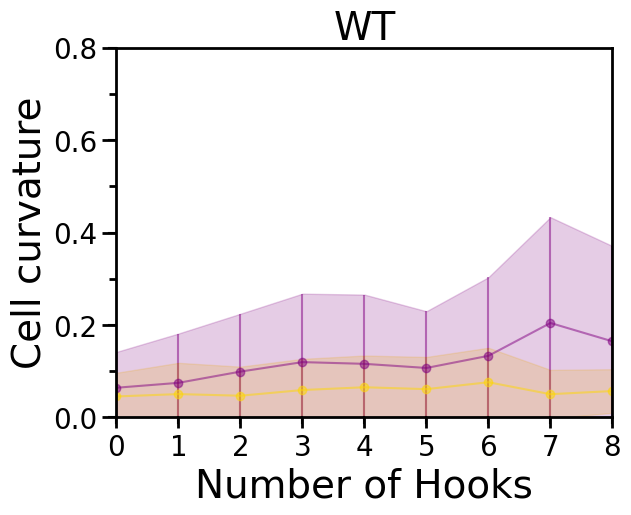

In [4]:
# Load your data - adjust the filenames as needed
df1 = pd.read_csv(folder_path1 + 'MicrobeJ_Res.csv')
df2 = pd.read_csv(folder_path2 + 'MicrobeJ_results.csv')
df3 = pd.read_csv(folder_path3 + 'MicrobeJ_Results.csv')

# Concatenate the three dataframes
df = pd.concat([df1, df2, df3], sort=False)

# Keep only rows that belong to either of the two strains EM15307 and EM15308
df = df[df['IMAGE'].isin(['EM11018', 'EM8250'])]

# Create a new column 'Maxima1_new' where 'Maxima1' values above 8 are replaced with 9
df['Maxima1_new'] = df['Maxima1'].apply(lambda x: 8 if x > 7 else x)

# Calculate mean and standard deviation of curvature for each 'Maxima1_new' value and 'IMAGE' category
grouped = df.groupby(['IMAGE', 'Maxima1_new'])['Curvature'].agg(['mean', 'std', 'count'])

# Reset index
grouped.reset_index(inplace=True)

# Print the count of Maxima1 values for each strain
print(grouped[(grouped['Maxima1_new'].isin(list(range(8)) + [8]))][['IMAGE', 'Maxima1_new', 'count']])

# Create separate dataframes for each strain
df1 = grouped[grouped['IMAGE'] == 'EM8250']
df2 = grouped[grouped['IMAGE'] == 'EM11018']

# Create plot
fig, ax = plt.subplots()

# Plot data for strain EM15307
ax.errorbar(df1['Maxima1_new'], df1['mean'], yerr=df1['std'], fmt='-o', color='#ffd700', label='WT', alpha=0.5)
ax.fill_between(df1['Maxima1_new'], df1['mean'] - df1['std'], df1['mean'] + df1['std'], color='#ffd700', alpha=0.2)

# Plot data for strain EM15308
ax.errorbar(df2['Maxima1_new'], df2['mean'], yerr=df2['std'], fmt='-o', color='#800080', label='ΔflhE', alpha=0.5)
ax.fill_between(df2['Maxima1_new'], df2['mean'] - df2['std'], df2['mean'] + df2['std'], color='#800080', alpha=0.2)

# Set plot labels and title
ax.set_xlabel('Number of Hooks', fontsize=28)
ax.set_ylabel('Cell curvature', fontsize=28)
#plt.legend(loc='upper left')

# Define and set y-ticks using the axes object
y_ticks = np.arange(0, 0.8 + 0.2, 0.2)  # Adjust the range as needed
y_tick_labels = [f"{y:.1f}" for y in y_ticks]  # Format to one decimal place
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_tick_labels, fontsize=20)

# Manually add y-tick lines
tick_length = 0.015  # adjust as needed
for y_tick in y_ticks:
    ax.plot([-tick_length, 0], [y_tick, y_tick], color='black', clip_on=False, transform=ax.get_yaxis_transform())

# Manually add x-tick lines
x_ticks = ax.get_xticks()  # Get the x-tick positions (assuming they are already set)
x_ticks = np.arange(0, 8 + 1, 1)  # Adjust the range as needed
for x_tick in x_ticks:
    ax.plot([x_tick, x_tick], [-tick_length, 0], color='black', clip_on=False, transform=ax.get_xaxis_transform())
    
plt.xticks(fontsize=20) 
ax.set_title('WT', fontsize=28)
ax.set_xlim([0, 8])  # adjust as needed
ax.set_ylim([0, 0.8])

# Increase the width of the axes and frame
for spine in plt.gca().spines.values():
    spine.set_linewidth(2)  # Adjust the width as needed

# Add minor ticks on y-axis without labels and adjust tick lengths and widths
plt.gca().yaxis.set_minor_locator(mticker.MultipleLocator(.1))
plt.tick_params(axis='y', which='minor', length=5, width=2)  # Adjust width and length of minor ticks
plt.tick_params(axis='y', which='major', length=10, width=2)  # Adjust width and length of major ticks
plt.tick_params(axis='x', which='major', length=8, width=2)  

# Show plot
plt.show()
#fig.savefig('P:/LAB/Manuel/2023/2023-07/Microscopy/20230729_FlhE_FliG_FlgE/WT-Concatenated-Hooks.tiff', 
 #           format='tiff', dpi=300, bbox_inches='tight')

      IMAGE  Maxima1_new  count
0   EM11018            0    169
1   EM11018            1    157
2   EM11018            2    150
3   EM11018            3    118
4   EM11018            4    100
5   EM11018            5     75
6   EM11018            6     49
7   EM11018            7     28
8   EM11018            8     61
9    EM8250            0    140
10   EM8250            1    192
11   EM8250            2    214
12   EM8250            3    220
13   EM8250            4    158
14   EM8250            5     86
15   EM8250            6     67
16   EM8250            7     34
17   EM8250            8     36


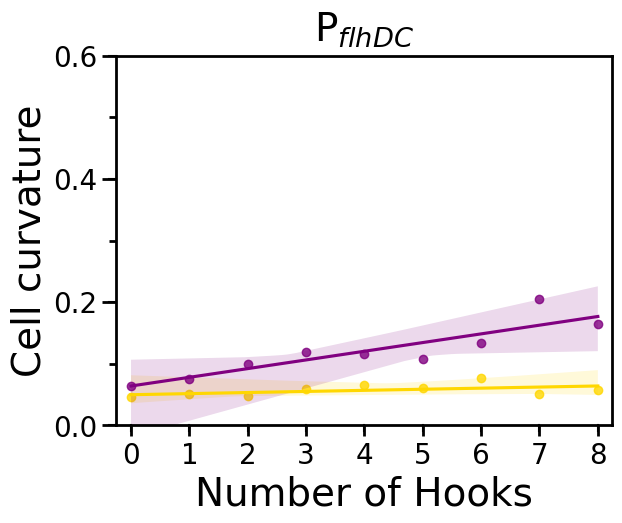

In [8]:
# Load your data - adjust the filenames as needed
df1 = pd.read_csv(folder_path1 + 'MicrobeJ_Res.csv')
df2 = pd.read_csv(folder_path2 + 'MicrobeJ_results.csv')
df3 = pd.read_csv(folder_path3 + 'MicrobeJ_Results.csv')

# Concatenate the three dataframes
df = pd.concat([df1, df2, df3], sort=False)

# Keep only rows that belong to either of the two strains EM15307 and EM15308
df = df[df['IMAGE'].isin(['EM11018', 'EM8250'])]

# Create a new column 'Maxima1_new' where 'Maxima1' values above 8 are replaced with 9
df['Maxima1_new'] = df['Maxima1'].apply(lambda x: 8 if x > 7 else x)

# Calculate mean and standard deviation of curvature for each 'Maxima1_new' value and 'IMAGE' category
grouped = df.groupby(['IMAGE', 'Maxima1_new'])['Curvature'].agg(['mean', 'std', 'count'])

# Reset index
grouped.reset_index(inplace=True)

# Print the count of Maxima1 values for each strain
print(grouped[(grouped['Maxima1_new'].isin(list(range(8)) + [8]))][['IMAGE', 'Maxima1_new', 'count']])

# Create separate dataframes for each strain
df1 = grouped[grouped['IMAGE'] == 'EM8250']
df2 = grouped[grouped['IMAGE'] == 'EM11018']

# Create plot
fig, ax = plt.subplots()

# Plot data for strain EM15307
# Create a scatter plot for strain EM8250 with a linear regression line
sns.regplot(x='Maxima1_new', y='mean', data=df1, ax=ax, color='#ffd700', ci=99.9, label='WT')

# Create a scatter plot for strain EM11018 with a linear regression line
sns.regplot(x='Maxima1_new', y='mean', data=df2, ax=ax, color='#800080', ci=99.9, label='ΔflhE')

# Set plot labels and title
ax.set_xlabel('Number of Hooks', fontsize=28)
ax.set_ylabel('Cell curvature', fontsize=28)
#plt.legend(loc='upper left')

# Define and set y-ticks using the axes object
y_ticks = np.arange(0, 0.6 + 0.2, 0.2)  # Adjust the range as needed
y_tick_labels = [f"{y:.1f}" for y in y_ticks]  # Format to one decimal place
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_tick_labels, fontsize=20)

# Manually add y-tick lines
tick_length = 0.015  # adjust as needed
for y_tick in y_ticks:
    ax.plot([-tick_length, 0], [y_tick, y_tick], color='black', clip_on=False, transform=ax.get_yaxis_transform())

# Manually add x-tick lines
x_ticks = ax.get_xticks()  # Get the x-tick positions (assuming they are already set)
x_ticks = np.arange(0, 8 + 1, 1)  # Adjust the range as needed
for x_tick in x_ticks:
    ax.plot([x_tick, x_tick], [-tick_length, 0], color='black', clip_on=False, transform=ax.get_xaxis_transform())
    
plt.xticks(fontsize=20) 
#ax.set_title(r'$\mathit{PflhDC}$', fontsize=28, y=1.02)
ax.set_title(r'P$\mathit{_{flhDC}}$', fontsize=28, y=1.02)
ax.set_xlim([-0.25, 8.25])  # adjust as needed
ax.set_ylim([0, 0.6])

# Increase the width of the axes and frame
for spine in plt.gca().spines.values():
    spine.set_linewidth(2)  # Adjust the width as needed

# Add minor ticks on y-axis without labels and adjust tick lengths and widths
plt.gca().yaxis.set_minor_locator(mticker.MultipleLocator(.1))
plt.tick_params(axis='y', which='minor', length=5, width=2)  # Adjust width and length of minor ticks
plt.tick_params(axis='y', which='major', length=10, width=2)  # Adjust width and length of major ticks
plt.tick_params(axis='x', which='major', length=8, width=2)  

# Show plot
plt.show()
fig.savefig('P:/LAB/Manuel/2023/2023-07/Microscopy/20230729_FlhE_FliG_FlgE/WT-CI-Hooks.tiff', 
            format='tiff', dpi=300, bbox_inches='tight')

      IMAGE  Maxima2_new  count
0   EM11018            0    158
1   EM11018            1     59
2   EM11018            2     78
3   EM11018            3     70
4   EM11018            4     79
5   EM11018            5     86
6   EM11018            6     74
7   EM11018            7     55
8   EM11018            8     42
11   EM8250            0     98
12   EM8250            1     70
13   EM8250            2    110
14   EM8250            3    133
15   EM8250            4    149
16   EM8250            5    145
17   EM8250            6    111
18   EM8250            7    102
19   EM8250            8     76


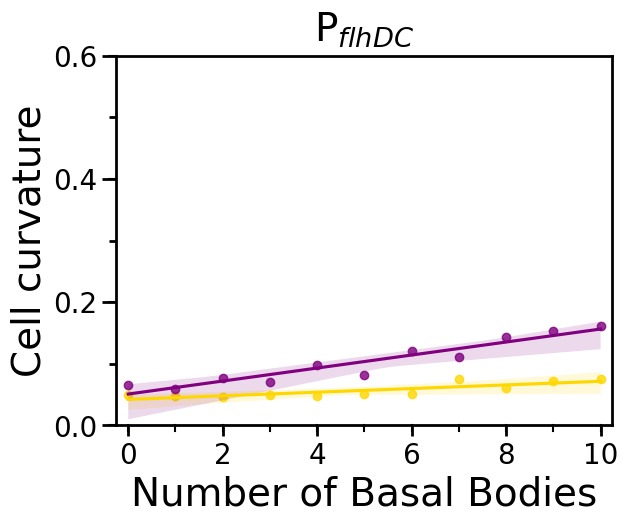

In [9]:
# Load your data - adjust the filenames as needed
df1 = pd.read_csv(folder_path1 + 'MicrobeJ_Res.csv')
df2 = pd.read_csv(folder_path2 + 'MicrobeJ_results.csv')
df3 = pd.read_csv(folder_path3 + 'MicrobeJ_Results.csv')

# Concatenate the three dataframes
df = pd.concat([df1, df2, df3], sort=False)

# Keep only rows that belong to either of the two strains EM15307 and EM15308
df = df[df['IMAGE'].isin(['EM11018', 'EM8250'])]

# Create a new column 'Maxima1_new' where 'Maxima1' values above 8 are replaced with 9
df['Maxima2_new'] = df['Maxima2'].apply(lambda x: 10 if x > 9 else x)

# Calculate mean and standard deviation of curvature for each 'Maxima1_new' value and 'IMAGE' category
grouped = df.groupby(['IMAGE', 'Maxima2_new'])['Curvature'].agg(['mean', 'std', 'count'])

# Reset index
grouped.reset_index(inplace=True)

# Print the count of Maxima1 values for each strain
print(grouped[(grouped['Maxima2_new'].isin(list(range(8)) + [8]))][['IMAGE', 'Maxima2_new', 'count']])

# Create separate dataframes for each strain
df1 = grouped[grouped['IMAGE'] == 'EM8250']
df2 = grouped[grouped['IMAGE'] == 'EM11018']

# Create plot
fig, ax = plt.subplots()

# Plot data for strain EM15307
# Create a scatter plot for strain EM8250 with a linear regression line
sns.regplot(x='Maxima2_new', y='mean', data=df1, ax=ax, color='#ffd700', ci=99.9, label='WT')

# Create a scatter plot for strain EM11018 with a linear regression line
sns.regplot(x='Maxima2_new', y='mean', data=df2, ax=ax, color='#800080', ci=99.9, label='ΔflhE')

# Set plot labels and title
ax.set_xlabel('Number of Basal Bodies', fontsize=28)
ax.set_ylabel('Cell curvature', fontsize=28)
#plt.legend(loc='upper left')

# Define and set y-ticks using the axes object
y_ticks = np.arange(0, 0.6 + 0.2, 0.2)  # Adjust the range as needed
y_tick_labels = [f"{y:.1f}" for y in y_ticks]  # Format to one decimal place
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_tick_labels, fontsize=20)

# Manually add y-tick lines
tick_length = 0.015  # adjust as needed
for y_tick in y_ticks:
    ax.plot([-tick_length, 0], [y_tick, y_tick], color='black', clip_on=False, transform=ax.get_yaxis_transform())

# Manually add x-tick lines
x_ticks = ax.get_xticks()  # Get the x-tick positions (assuming they are already set)
x_ticks = np.arange(0, 10 + 1, 1)  # Adjust the range as needed
for x_tick in x_ticks:
    ax.plot([x_tick, x_tick], [-tick_length, 0], color='black', clip_on=False, transform=ax.get_xaxis_transform())
    
plt.xticks(fontsize=20) 
ax.set_title(r'P$\mathit{_{flhDC}}$', fontsize=28, y=1.02)
ax.set_xlim([-0.25, 10.25])  # adjust as needed
ax.set_ylim([0, 0.6])

# Increase the width of the axes and frame
for spine in plt.gca().spines.values():
    spine.set_linewidth(2)  # Adjust the width as needed

# Add minor ticks on y-axis without labels and adjust tick lengths and widths
plt.gca().yaxis.set_minor_locator(mticker.MultipleLocator(.1))
plt.tick_params(axis='y', which='minor', length=5, width=2)  # Adjust width and length of minor ticks
plt.tick_params(axis='y', which='major', length=10, width=2)  # Adjust width and length of major ticks
plt.tick_params(axis='x', which='major', length=8, width=2)  

# Show plot
plt.show()
fig.savefig('P:/LAB/Manuel/2023/2023-07/Microscopy/20230729_FlhE_FliG_FlgE/WT-CI-BB.tiff', 
            format='tiff', dpi=300, bbox_inches='tight')

      IMAGE  Maxima1_new  count
0   EM15307            0    154
1   EM15307            1    372
2   EM15307            2    314
3   EM15307            3    180
4   EM15307            4     72
5   EM15307            5     31
6   EM15307            6     16
7   EM15308            0    222
8   EM15308            1    358
9   EM15308            2    281
10  EM15308            3    167
11  EM15308            4     84
12  EM15308            5     28
13  EM15308            6     47


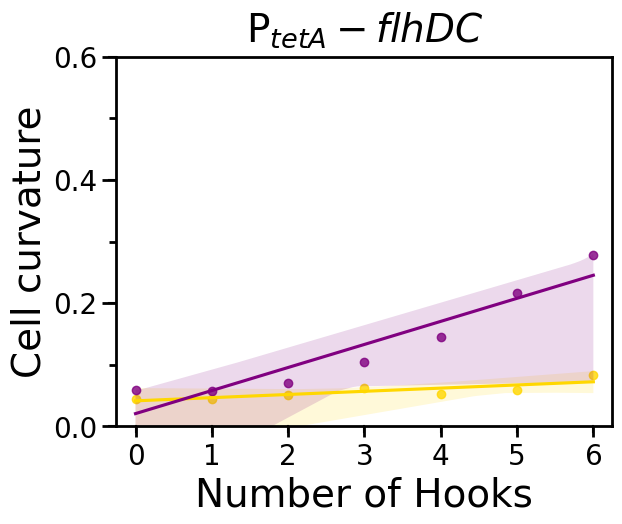

In [10]:
# Load your data - adjust the filenames as needed
df1 = pd.read_csv(folder_path1 + 'MicrobeJ_Res.csv')
df2 = pd.read_csv(folder_path2 + 'MicrobeJ_results.csv')
df3 = pd.read_csv(folder_path3 + 'MicrobeJ_Results.csv')

# Concatenate the three dataframes
df = pd.concat([df1, df2, df3], sort=False)

# Keep only rows that belong to either of the two strains EM15307 and EM15308
df = df[df['IMAGE'].isin(['EM15307', 'EM15308'])]

# Create a new column 'Maxima1_new' where 'Maxima1' values above 8 are replaced with 9
df['Maxima1_new'] = df['Maxima1'].apply(lambda x: 6 if x > 5 else x)

# Calculate mean and standard deviation of curvature for each 'Maxima1_new' value and 'IMAGE' category
grouped = df.groupby(['IMAGE', 'Maxima1_new'])['Curvature'].agg(['mean', 'std', 'count'])

# Reset index
grouped.reset_index(inplace=True)

# Print the count of Maxima1 values for each strain
print(grouped[(grouped['Maxima1_new'].isin(list(range(8)) + [8]))][['IMAGE', 'Maxima1_new', 'count']])

# Create separate dataframes for each strain
df1 = grouped[grouped['IMAGE'] == 'EM15307']
df2 = grouped[grouped['IMAGE'] == 'EM15308']

# Create plot
fig, ax = plt.subplots()

# Plot data for strain EM15307
# Create a scatter plot for strain EM8250 with a linear regression line
sns.regplot(x='Maxima1_new', y='mean', data=df1, ax=ax, color='#ffd700', ci=99.9, label='WT')

# Create a scatter plot for strain EM11018 with a linear regression line
sns.regplot(x='Maxima1_new', y='mean', data=df2, ax=ax, color='#800080', ci=99.9, label='ΔflhE')

# Set plot labels and title
ax.set_xlabel('Number of Hooks', fontsize=28)
ax.set_ylabel('Cell curvature', fontsize=28)
#plt.legend(loc='upper left')

# Define and set y-ticks using the axes object
y_ticks = np.arange(0, 0.6 + 0.2, 0.2)  # Adjust the range as needed
y_tick_labels = [f"{y:.1f}" for y in y_ticks]  # Format to one decimal place
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_tick_labels, fontsize=20)

# Manually add y-tick lines
tick_length = 0.015  # adjust as needed
for y_tick in y_ticks:
    ax.plot([-tick_length, 0], [y_tick, y_tick], color='black', clip_on=False, transform=ax.get_yaxis_transform())

# Manually add x-tick lines
x_ticks = ax.get_xticks()  # Get the x-tick positions (assuming they are already set)
x_ticks = np.arange(0, 6 + 1, 1)  # Adjust the range as needed
for x_tick in x_ticks:
    ax.plot([x_tick, x_tick], [-tick_length, 0], color='black', clip_on=False, transform=ax.get_xaxis_transform())
    
plt.xticks(fontsize=20) 
#ax.set_title(r'$\mathit{PtetA-flhDC}$', fontsize=28)
ax.set_title(r'P$\mathit{_{tetA}-flhDC}$', fontsize=28, y=1.02)
ax.set_xlim([-0.25, 6.25])  # adjust as needed
ax.set_ylim([0, 0.6])

# Increase the width of the axes and frame
for spine in plt.gca().spines.values():
    spine.set_linewidth(2)  # Adjust the width as needed

# Add minor ticks on y-axis without labels and adjust tick lengths and widths
plt.gca().yaxis.set_minor_locator(mticker.MultipleLocator(.1))
plt.tick_params(axis='y', which='minor', length=5, width=2)  # Adjust width and length of minor ticks
plt.tick_params(axis='y', which='major', length=10, width=2)  # Adjust width and length of major ticks
plt.tick_params(axis='x', which='major', length=8, width=2)  

# Show plot
plt.show()
fig.savefig('P:/LAB/Manuel/2023/2023-07/Microscopy/20230729_FlhE_FliG_FlgE/Ptet-CI-Hooks.tiff', 
            format='tiff', dpi=300, bbox_inches='tight')

      IMAGE  Maxima2_new  count
0   EM15307            0     64
1   EM15307            1    185
2   EM15307            2    258
3   EM15307            3    233
4   EM15307            4    179
5   EM15307            5    105
6   EM15307            6     55
7   EM15307            7     29
8   EM15307            8     31
9   EM15308            0     81
10  EM15308            1    199
11  EM15308            2    273
12  EM15308            3    222
13  EM15308            4    160
14  EM15308            5    101
15  EM15308            6     49
16  EM15308            7     29
17  EM15308            8     73


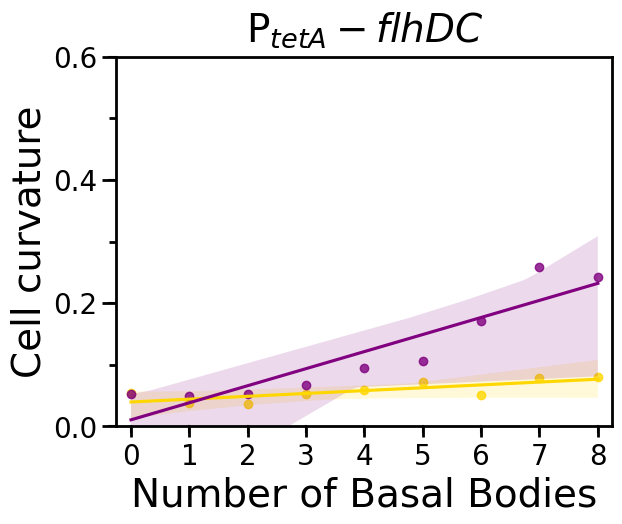

In [11]:
# Load your data - adjust the filenames as needed
df1 = pd.read_csv(folder_path1 + 'MicrobeJ_Res.csv')
df2 = pd.read_csv(folder_path2 + 'MicrobeJ_results.csv')
df3 = pd.read_csv(folder_path3 + 'MicrobeJ_Results.csv')

# Concatenate the three dataframes
df = pd.concat([df1, df2, df3], sort=False)

# Keep only rows that belong to either of the two strains EM15307 and EM15308
df = df[df['IMAGE'].isin(['EM15307', 'EM15308'])]

# Create a new column 'Maxima1_new' where 'Maxima1' values above 8 are replaced with 9
df['Maxima2_new'] = df['Maxima2'].apply(lambda x: 8 if x > 7 else x)

# Calculate mean and standard deviation of curvature for each 'Maxima1_new' value and 'IMAGE' category
grouped = df.groupby(['IMAGE', 'Maxima2_new'])['Curvature'].agg(['mean', 'std', 'count'])

# Reset index
grouped.reset_index(inplace=True)

# Print the count of Maxima1 values for each strain
print(grouped[(grouped['Maxima2_new'].isin(list(range(8)) + [8]))][['IMAGE', 'Maxima2_new', 'count']])

# Create separate dataframes for each strain
df1 = grouped[grouped['IMAGE'] == 'EM15307']
df2 = grouped[grouped['IMAGE'] == 'EM15308']

# Create plot
fig, ax = plt.subplots()

# Plot data for strain EM15307
# Create a scatter plot for strain EM8250 with a linear regression line
sns.regplot(x='Maxima2_new', y='mean', data=df1, ax=ax, color='#ffd700', ci=99.9, label='WT')

# Create a scatter plot for strain EM11018 with a linear regression line
sns.regplot(x='Maxima2_new', y='mean', data=df2, ax=ax, color='#800080', ci=99.9, label='ΔflhE')

# Set plot labels and title
ax.set_xlabel('Number of Basal Bodies', fontsize=28)
ax.set_ylabel('Cell curvature', fontsize=28)
#plt.legend(loc='upper left')

# Define and set y-ticks using the axes object
y_ticks = np.arange(0, 0.6 + 0.2, 0.2)  # Adjust the range as needed
y_tick_labels = [f"{y:.1f}" for y in y_ticks]  # Format to one decimal place
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_tick_labels, fontsize=20)

# Manually add y-tick lines
tick_length = 0.015  # adjust as needed
for y_tick in y_ticks:
    ax.plot([-tick_length, 0], [y_tick, y_tick], color='black', clip_on=False, transform=ax.get_yaxis_transform())

# Manually add x-tick lines
x_ticks = ax.get_xticks()  # Get the x-tick positions (assuming they are already set)
x_ticks = np.arange(0, 8 + 1, 1)  # Adjust the range as needed
for x_tick in x_ticks:
    ax.plot([x_tick, x_tick], [-tick_length, 0], color='black', clip_on=False, transform=ax.get_xaxis_transform())
    
plt.xticks(fontsize=20) 
ax.set_title(r'P$\mathit{_{tetA}-flhDC}$', fontsize=28, y=1.02)
ax.set_xlim([-0.25, 8.25])  # adjust as needed
ax.set_ylim([0, 0.6])

# Increase the width of the axes and frame
for spine in plt.gca().spines.values():
    spine.set_linewidth(2)  # Adjust the width as needed

# Add minor ticks on y-axis without labels and adjust tick lengths and widths
plt.gca().yaxis.set_minor_locator(mticker.MultipleLocator(.1))
plt.tick_params(axis='y', which='minor', length=5, width=2)  # Adjust width and length of minor ticks
plt.tick_params(axis='y', which='major', length=10, width=2)  # Adjust width and length of major ticks
plt.tick_params(axis='x', which='major', length=8, width=2)  

# Show plot
plt.show()
fig.savefig('P:/LAB/Manuel/2023/2023-07/Microscopy/20230729_FlhE_FliG_FlgE/Ptet-CI-BB.tiff', 
            format='tiff', dpi=300, bbox_inches='tight')

      IMAGE  Maxima1_new  count
0   EM12501            0      4
1   EM12501            1     34
2   EM12501            2     73
3   EM12501            3    131
4   EM12501            4    183
5   EM12501            5    180
6   EM12501            6    155
7   EM12501            7    129
8   EM12501            8     92
13  EM12844            0      8
14  EM12844            1      7
15  EM12844            2     18
16  EM12844            3     27
17  EM12844            4     43
18  EM12844            5     79
19  EM12844            6     63
20  EM12844            7     89
21  EM12844            8     97


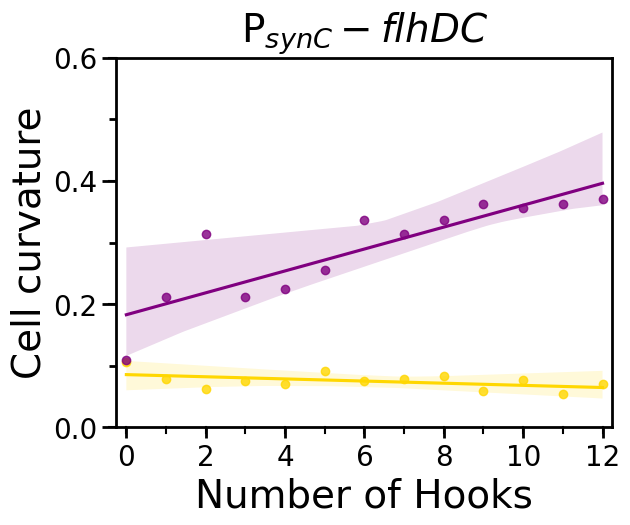

In [12]:
# Load your data - adjust the filenames as needed
df1 = pd.read_csv(folder_path1 + 'MicrobeJ_Res.csv')
df2 = pd.read_csv(folder_path2 + 'MicrobeJ_results.csv')
df3 = pd.read_csv(folder_path3 + 'MicrobeJ_Results.csv')

# Concatenate the three dataframes
df = pd.concat([df1, df2, df3], sort=False)

# Keep only rows that belong to either of the two strains EM15307 and EM15308
df = df[df['IMAGE'].isin(['EM12501', 'EM12844'])]

# Create a new column 'Maxima1_new' where 'Maxima1' values above 8 are replaced with 9
df['Maxima1_new'] = df['Maxima1'].apply(lambda x: 12 if x > 11 else x)

# Calculate mean and standard deviation of curvature for each 'Maxima1_new' value and 'IMAGE' category
grouped = df.groupby(['IMAGE', 'Maxima1_new'])['Curvature'].agg(['mean', 'std', 'count'])

# Reset index
grouped.reset_index(inplace=True)

# Print the count of Maxima1 values for each strain
print(grouped[(grouped['Maxima1_new'].isin(list(range(8)) + [8]))][['IMAGE', 'Maxima1_new', 'count']])

# Create separate dataframes for each strain
df1 = grouped[grouped['IMAGE'] == 'EM12501']
df2 = grouped[grouped['IMAGE'] == 'EM12844']

# Create plot
fig, ax = plt.subplots()

# Plot data for strain EM15307
# Create a scatter plot for strain EM8250 with a linear regression line
sns.regplot(x='Maxima1_new', y='mean', data=df1, ax=ax, color='#ffd700', ci=99.9, label='WT')

# Create a scatter plot for strain EM11018 with a linear regression line
sns.regplot(x='Maxima1_new', y='mean', data=df2, ax=ax, color='#800080', ci=99.9, label='ΔflhE')

# Set plot labels and title
ax.set_xlabel('Number of Hooks', fontsize=28)
ax.set_ylabel('Cell curvature', fontsize=28)
#plt.legend(loc='upper left')

# Define and set y-ticks using the axes object
y_ticks = np.arange(0, 0.6 + 0.2, 0.2)  # Adjust the range as needed
y_tick_labels = [f"{y:.1f}" for y in y_ticks]  # Format to one decimal place
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_tick_labels, fontsize=20)

# Manually add y-tick lines
tick_length = 0.015  # adjust as needed
for y_tick in y_ticks:
    ax.plot([-tick_length, 0], [y_tick, y_tick], color='black', clip_on=False, transform=ax.get_yaxis_transform())

# Manually add x-tick lines
x_ticks = ax.get_xticks()  # Get the x-tick positions (assuming they are already set)
x_ticks = np.arange(0, 12 + 1, 1)  # Adjust the range as needed
for x_tick in x_ticks:
    ax.plot([x_tick, x_tick], [-tick_length, 0], color='black', clip_on=False, transform=ax.get_xaxis_transform())
    
plt.xticks(fontsize=20) 
ax.set_title(r'P$\mathit{_{synC}-flhDC}$', fontsize=28, y=1.02)
ax.set_xlim([-0.25, 12.25])  # adjust as needed
ax.set_ylim([0, 0.6])

# Increase the width of the axes and frame
for spine in plt.gca().spines.values():
    spine.set_linewidth(2)  # Adjust the width as needed

# Add minor ticks on y-axis without labels and adjust tick lengths and widths
plt.gca().yaxis.set_minor_locator(mticker.MultipleLocator(.1))
plt.tick_params(axis='y', which='minor', length=5, width=2)  # Adjust width and length of minor ticks
plt.tick_params(axis='y', which='major', length=10, width=2)  # Adjust width and length of major ticks
plt.tick_params(axis='x', which='major', length=8, width=2)  

# Show plot
plt.show()
fig.savefig('P:/LAB/Manuel/2023/2023-07/Microscopy/20230729_FlhE_FliG_FlgE/ProC-CI-Hooks.tiff', 
            format='tiff', dpi=300, bbox_inches='tight')

      IMAGE  Maxima2_new  count
0   EM12501            0      1
1   EM12501            3      4
2   EM12501            4     14
3   EM12501            5     23
4   EM12501            6     73
5   EM12501            7    104
6   EM12501            8    136
15  EM12844            0      2
16  EM12844            1      1
17  EM12844            2      1
18  EM12844            4      3
19  EM12844            5     10
20  EM12844            6     17
21  EM12844            7     27
22  EM12844            8     32


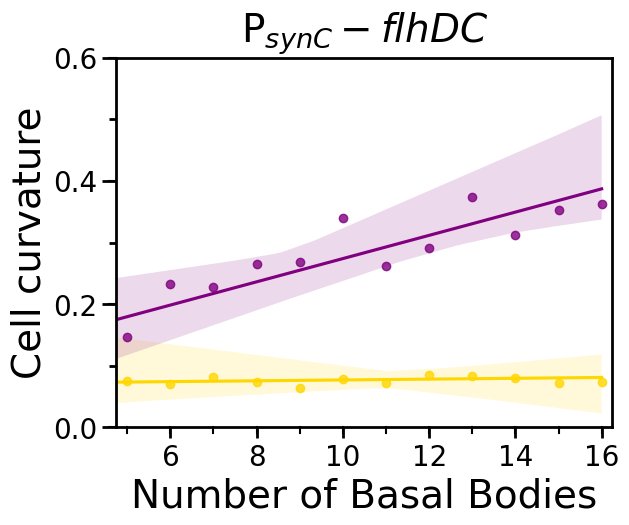

In [13]:
# Load your data - adjust the filenames as needed
df1 = pd.read_csv(folder_path1 + 'MicrobeJ_Res.csv')
df2 = pd.read_csv(folder_path2 + 'MicrobeJ_results.csv')
df3 = pd.read_csv(folder_path3 + 'MicrobeJ_Results.csv')

# Concatenate the three dataframes
df = pd.concat([df1, df2, df3], sort=False)

# Keep only rows that belong to either of the two strains EM15307 and EM15308
df = df[df['IMAGE'].isin(['EM12501', 'EM12844'])]

# Create a new column 'Maxima1_new' where 'Maxima1' values above 8 are replaced with 9
df['Maxima2_new'] = df['Maxima2'].apply(lambda x: 16 if x > 15 else x)

# Calculate mean and standard deviation of curvature for each 'Maxima1_new' value and 'IMAGE' category
grouped = df.groupby(['IMAGE', 'Maxima2_new'])['Curvature'].agg(['mean', 'std', 'count'])

# Reset index
grouped.reset_index(inplace=True)

# Print the count of Maxima1 values for each strain
print(grouped[(grouped['Maxima2_new'].isin(list(range(8)) + [8]))][['IMAGE', 'Maxima2_new', 'count']])

# Create separate dataframes for each strain
df1 = grouped[grouped['IMAGE'] == 'EM12501']
df2 = grouped[grouped['IMAGE'] == 'EM12844']

# Create plot
fig, ax = plt.subplots()

# Plot data for strain EM15307
# Create a scatter plot for strain EM8250 with a linear regression line
sns.regplot(x='Maxima2_new', y='mean', data=df1, ax=ax, color='#ffd700', ci=99.9, label='WT')

# Create a scatter plot for strain EM11018 with a linear regression line
sns.regplot(x='Maxima2_new', y='mean', data=df2, ax=ax, color='#800080', ci=99.9, label='ΔflhE')

# Set plot labels and title
ax.set_xlabel('Number of Basal Bodies', fontsize=28)
ax.set_ylabel('Cell curvature', fontsize=28)
#plt.legend(loc='upper left')

# Define and set y-ticks using the axes object
y_ticks = np.arange(0, 0.6 + 0.2, 0.2)  # Adjust the range as needed
y_tick_labels = [f"{y:.1f}" for y in y_ticks]  # Format to one decimal place
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_tick_labels, fontsize=20)

# Manually add y-tick lines
tick_length = 0.015  # adjust as needed
for y_tick in y_ticks:
    ax.plot([-tick_length, 0], [y_tick, y_tick], color='black', clip_on=False, transform=ax.get_yaxis_transform())

# Manually add x-tick lines
x_ticks = ax.get_xticks()  # Get the x-tick positions (assuming they are already set)
x_ticks = np.arange(5, 16 + 1, 1)  # Adjust the range as needed
for x_tick in x_ticks:
    ax.plot([x_tick, x_tick], [-tick_length, 0], color='black', clip_on=False, transform=ax.get_xaxis_transform())
    
plt.xticks(fontsize=20) 
ax.set_title(r'P$\mathit{_{synC}-flhDC}$', fontsize=28, y=1.02)
ax.set_xlim([4.75, 16.25])  # adjust as needed
ax.set_ylim([0, 0.6])

# Increase the width of the axes and frame
for spine in plt.gca().spines.values():
    spine.set_linewidth(2)  # Adjust the width as needed

# Add minor ticks on y-axis without labels and adjust tick lengths and widths
plt.gca().yaxis.set_minor_locator(mticker.MultipleLocator(.1))
plt.tick_params(axis='y', which='minor', length=5, width=2)  # Adjust width and length of minor ticks
plt.tick_params(axis='y', which='major', length=10, width=2)  # Adjust width and length of major ticks
plt.tick_params(axis='x', which='major', length=8, width=2)  

# Show plot
plt.show()
fig.savefig('P:/LAB/Manuel/2023/2023-07/Microscopy/20230729_FlhE_FliG_FlgE/ProC-CI-BB.tiff', 
            format='tiff', dpi=300, bbox_inches='tight')